### ANSWER_1

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
data = pd.read_csv("diabetes.csv")

In [51]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
data.shape

(768, 9)

In [53]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
np.random.seed(126)

In [55]:
n = data.sample(25)

In [56]:
n.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
681,0,162,76,36,0,49.6,0.364,26,1
678,3,121,52,0,0,36.0,0.127,25,1
656,2,101,58,35,90,21.8,0.155,22,0
730,3,130,78,23,79,28.4,0.323,34,1
25,10,125,70,26,115,31.1,0.205,41,1


In [57]:
n.shape

(25, 9)

In [58]:
n_mean = n['Glucose'].mean()

In [59]:
n_max = n['Glucose'].max()

In [60]:
pop_mean = data['Glucose'].mean()

In [61]:
pop_max = data['Glucose'].max()

In [62]:
print("Sample Mean: ",n_mean)
print("Sample Max: ",n_max)
print("Population Mean: ",pop_mean)
print("Population Max: ",pop_max)

Sample Mean:  127.92
Sample Max:  197
Population Mean:  120.89453125
Population Max:  199


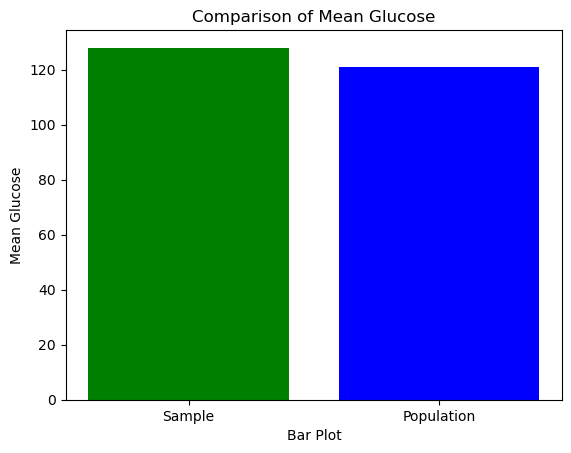

In [63]:
plt.bar(["Sample", "Population"], [n_mean, pop_mean],color=['green', 'blue'])
plt.xlabel("Bar Plot")
plt.ylabel("Mean Glucose")
plt.title("Comparison of Mean Glucose")
plt.show()

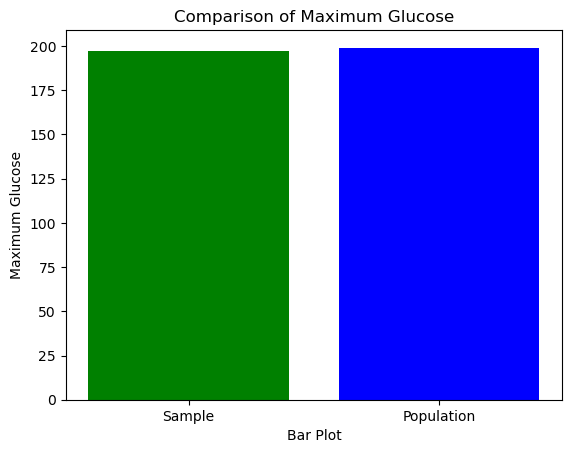

In [64]:
plt.bar(["Sample", "Population"], [n_max, pop_max],color=['green', 'blue'])
plt.xlabel("Bar Plot")
plt.ylabel("Maximum Glucose")
plt.title("Comparison of Maximum Glucose")
plt.show()

### The sample maximum is smaller than the population, indicating that there may be a few outliers in the population that are not represented in the sample, and the sample mean is marginally higher than the population mean, indicating that the sample is not exactly representative of the population but it is close.

### ANSWER_2

In [65]:
n_98percentile = n['BMI'].quantile(0.98)

In [66]:
pop_98percentile = data['BMI'].quantile(0.98)

In [67]:
print("98th percentile for Sample: ",n_98percentile)
print("98th percentile for Population: ",pop_98percentile)

98th percentile for Sample:  47.92
98th percentile for Population:  47.52599999999996


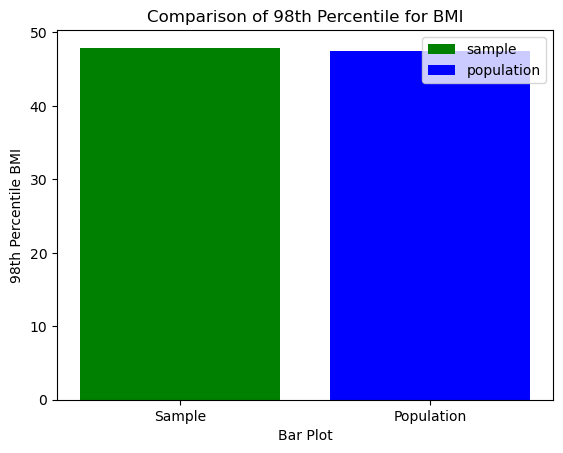

In [68]:
plt.bar(["Sample", "Population"], [n_98percentile, pop_98percentile], color=['green', 'blue'],label=['sample','population'])
plt.xlabel("Bar Plot")
plt.ylabel("98th Percentile BMI")
plt.legend()
plt.title("Comparison of 98th Percentile for BMI")
plt.show()

### This indicates that while the sample is representative of the population, some extreme values that exist within the population may not have been captured.

### ANSWER_3

Population -------->
Population mean: 69.10546875
Population standard deviation: 19.355807170644777
Population 95th percentile: 90.0
Bootstrap  -------->
Bootstrap mean: 69.11725333333332
Bootstrap standard deviation: 19.150566010368994
Bootstrap 95th percentile: 90.93749999999997


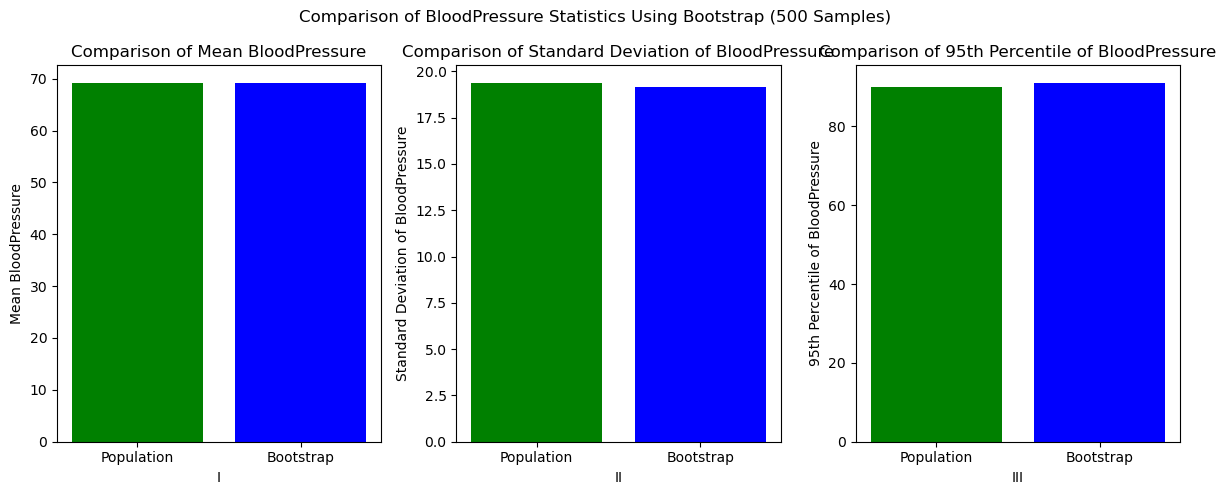

In [69]:
bootstrap_samples = []
for i in range(500):
    sample = data.sample(150, replace=True)
    bootstrap_samples.append(sample)

bootstrap_means = []
bootstrap_stds = []
bootstrap_95thpercentiles = []
for sample in bootstrap_samples:
    bootstrap_means.append(sample["BloodPressure"].mean())
    bootstrap_stds.append(sample["BloodPressure"].std())
    bootstrap_95thpercentiles.append(sample["BloodPressure"].quantile(0.95))


pop_mean = data["BloodPressure"].mean()
pop_std = data["BloodPressure"].std()
pop_95thpercentile = data["BloodPressure"].quantile(0.95)

print("Population -------->")
print("Population mean:", pop_mean)
print("Population standard deviation:", pop_std)
print("Population 95th percentile:", pop_95thpercentile)

print("Bootstrap  -------->")
print("Bootstrap mean:", np.mean(bootstrap_means))
print("Bootstrap standard deviation:", np.mean(bootstrap_stds))
print("Bootstrap 95th percentile:", np.mean(bootstrap_95thpercentiles))


plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.bar(["Population", "Bootstrap"], [pop_mean, np.mean(bootstrap_means)],color=['green', 'blue'])
plt.xlabel("I")
plt.ylabel("Mean BloodPressure")
plt.title("Comparison of Mean BloodPressure")

plt.subplot(1, 3, 2)
plt.bar(["Population", "Bootstrap"], [pop_std, np.mean(bootstrap_stds)],color=['green', 'blue'])
plt.xlabel("II")
plt.ylabel("Standard Deviation of BloodPressure")
plt.title("Comparison of Standard Deviation of BloodPressure")

plt.subplot(1, 3, 3)
plt.bar(["Population", "Bootstrap"], [pop_95thpercentile, np.mean(bootstrap_95thpercentiles)],color=['green', 'blue'])
plt.xlabel("III")
plt.ylabel("95th Percentile of BloodPressure")
plt.title("Comparison of 95th Percentile of BloodPressure")

plt.suptitle("Comparison of BloodPressure Statistics Using Bootstrap (500 Samples)")
plt.tight_layout()
plt.show()



### It seems that the bootstrap approach is effective for estimating population statistics because of the strong similarity between the bootstrap statistics and the population statistics.